In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('../data/mental_health.csv')

In [3]:
df.shape

(53043, 3)

In [4]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## EDA & Preprocessing

In [6]:
# Check for missing values
df.isnull().sum()

statement    362
status         0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(52681, 2)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Explaining the statuses:

1. **Normal**: The person is mentally healthy.
2. **Depression**: The person is suffering from depression.
3. **Suicidal**: The person is having suicidal thoughts.
4. **Anxiety**: The person is suffering from anxiety.
5. **Bipolar**: The person is suffering from bipolar disorder.
6. **Stress**: The person is under stress.
7. **Personality Disorder**: The person is suffering from a personality disorder.

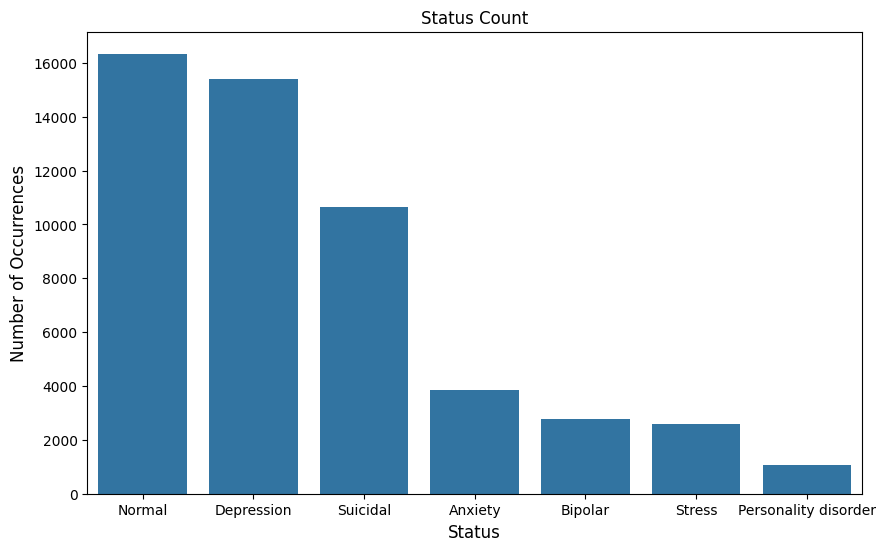

In [10]:
status_count = df['status'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=status_count.index, y=status_count.values)
plt.title('Status Count')

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Status', fontsize=12)

plt.show()

In [11]:
status_count

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [12]:
class_mapping = {
    'Normal': 'Normal',
    'Depression': 'Depression',
    'Suicidal': 'Suicidal',
    'Anxiety': 'Disorder',
    'Bipolar': 'Disorder',
    'Stress': 'Disorder',
    'Personality disorder': 'Disorder',
}

# Apply the mapping to the 'sentiment' column in your DataFrame
df['combined_sentiment'] = df['status'].map(class_mapping)

# Check the value counts after combining classes
print(df['combined_sentiment'].value_counts())

combined_sentiment
Normal        16343
Depression    15404
Suicidal      10652
Disorder      10282
Name: count, dtype: int64


In [13]:
df.drop(columns=['status'], inplace=True)

In [14]:
df = df.rename(columns={'combined_sentiment': 'sentiment'})

In [15]:
df['sentiment'].unique()

array(['Disorder', 'Normal', 'Depression', 'Suicidal'], dtype=object)

In [16]:
def map_sentiment(sentiment):
    if sentiment == 'Normal':
        return 0
    elif sentiment == 'Depression':
        return 1
    elif sentiment == 'Disorder':
        return 2
    else:
        return 3
    
df['sentiment'] = df['sentiment'].apply(map_sentiment)

In [17]:
df['word_count'] = df['statement'].apply(lambda x: len(x.split()))

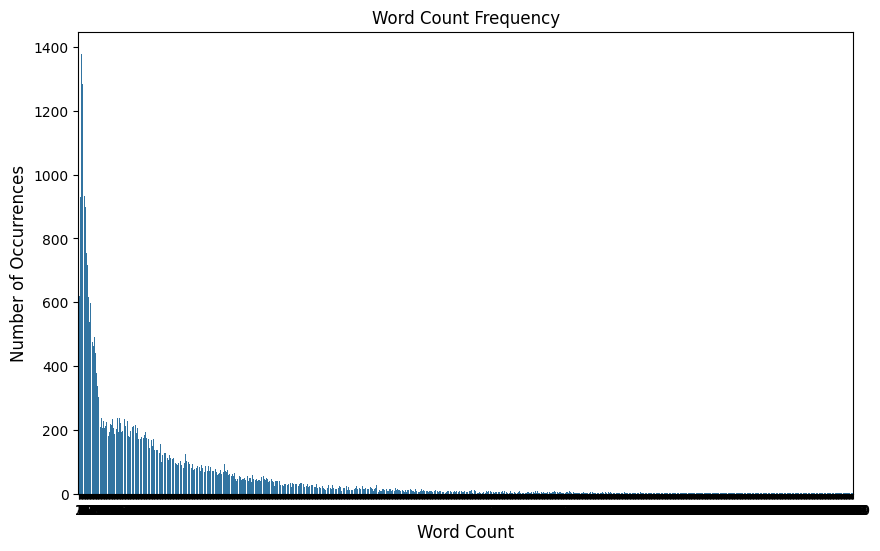

In [18]:
word_counts = df['word_count'].value_counts()

min_word_count = word_counts.index.min()
max_word_count = word_counts.index.max()

plt.figure(figsize=(10,6))
sns.barplot(x=word_counts.index, y=word_counts.values)

plt.title('Word Count Frequency')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Word Count', fontsize=12)
plt.show()

In [19]:
min_word_count, max_word_count

(1, 6300)

In [20]:
lower_lim = 3
upper_lim = 300

df['statement'] = df['statement'].apply(lambda x: x if len(x.split()) > lower_lim and len(x.split()) < upper_lim else None)
df.dropna(inplace=True)

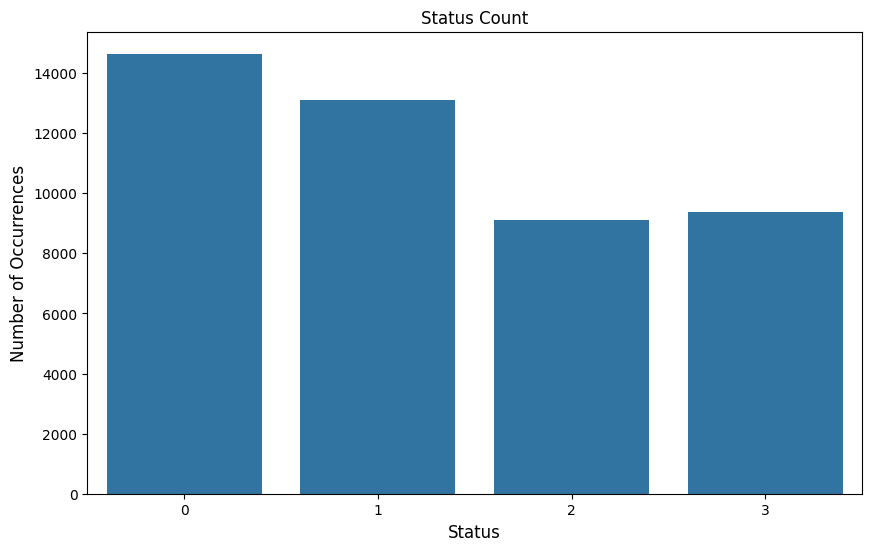

In [21]:
status_count = df['sentiment'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=status_count.index, y=status_count.values)
plt.title('Status Count')

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Status', fontsize=12)

plt.show()

In [22]:
status_count

sentiment
0    14645
1    13095
3     9379
2     9119
Name: count, dtype: int64

In [23]:
df.drop(columns=['word_count'], inplace=True)

In [24]:
df.to_csv('../data/mental_health_processed.csv', index=False)

In [27]:
# print 5 statements from each class

normal = df[df['sentiment'] == 0]['statement'].sample(5).values
depression = df[df['sentiment'] == 1]['statement'].sample(5).values
disorder = df[df['sentiment'] == 2]['statement'].sample(5).values
suicidal = df[df['sentiment'] == 3]['statement'].sample(5).values  

print('Normal:')
for statement in normal:
    print(statement)
    print()

Normal:
my waist is bigger than it was.

can we go home ok 

Why is this Shane Filan the older he gets, the tighter he gets.

i wish i was free that night. i'm kind of mad that i didn't go.

Lm Want to eat messy bio that can be qris



In [28]:
print('Depression:')
for statement in depression:
    print(statement)
    print()

Depression:
So, this happened some years ago. When I was about 5, we had a small doggy may be less than 7 months old. Well, she got sick and me being just a kid did not have much saying on what needs to be done and it was my first experience with a sick animal so I did not even know what to do, I was scared and did not want to lose her. Just thought grown-ups will make everything right.She did not make it as fever reached her brain, back then I did not know what that means. Now, 14 years later I have been remembering her for a little over a month. How I could have saved her if I nagged my parents even more, might have admitted her to a better vet hospital. She could have been with us now.Idk I kind of want to end stuff, I could not save her. She was just a pup. Been crying since a month

Why? I am literally in hell everyday. Why should I keep having to live this way? Its fucking exhausting. I am just done. Why do I have to keep going on, if I am miserable?

Just to adress this: I have 

In [29]:
print('Disorder:')
for statement in disorder:
    print(statement)
    print()

Disorder:
Feeling overwhelmed with work and life? Here's how to manage stress at work!  [https://movexstill.com/blog/how-to-manage-stress-at-work](https://movexstill.com/blog/how-to-manage-stress-at-work)

I don’t wanna dieeeeeee I’m not dying but I’m scared I’m gonna get lung cancer lol kill me. 

My mom smokes and I’m fucking 16 and idk why I’m paranoid ab this now it’s just stupid.

Been like this ever since fucking last year when I had a lump in my jawline. It turned out to be a swollen salvitory gland or something and basically nothing.

My doctor told me it could be cause for concern when he felt it (fuck him) so we looked shit up and it caused me to be concerned lmao. 

It came back tho but I think this is just a swollen lymph node because I think I have bronchitis or the cold or something who knows but still I get overly paranoid especially after drinking coffee I prolly gonna have to quit it.

Getting a psychiatrist referral in Australia Hey guys, 

I'm on the annoying wait fo

In [30]:
print('Suicidal:')
for statement in suicidal:
    print(statement)
    print()

Suicidal:
Idk where else to post this, but this is something I have been thinking about a bit. And I do not mean this post in a gate keeping or judging way. I deep down always kind of suspect that suicide attempts where people take a big amount of a pill but do not take anything to prevent throwing up are more of a cry for help thing just like cutting yourself superficial, so there will not be any scars but some blood and crust to show. People see someone on tv or wherever doing it and recognize that these kind of actions/tropes communicateIm desperate/I need help and then replicate them to communicate this message to their environment. I think this kind of blurs the line between really suicidal people/people who harm themselves as symptoms of an mental illness and the ones who are just asking for help. Suicide as an ask for help

Fuck living man, it is constant struggle, people even your own family putting you down. Zero trust in their own son. it is hard to get a job in these scenari